<a href="https://colab.research.google.com/github/siming-deng/micro_cred_winter_2022/blob/main/Machine_Learning_Logistic_Regression_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Get the Data
**Read in the advertising.csv file and load it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20B/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

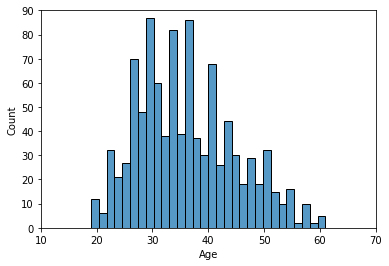

In [6]:
plt.xlim([10,70])
plt.ylim([0,90])
sns.set_style('whitegrid')
sns.histplot(ad_data['Age'], bins = 30, edgecolor = 'black', linewidth = 1)

**Create a jointplot showing Area Income versus Age.**

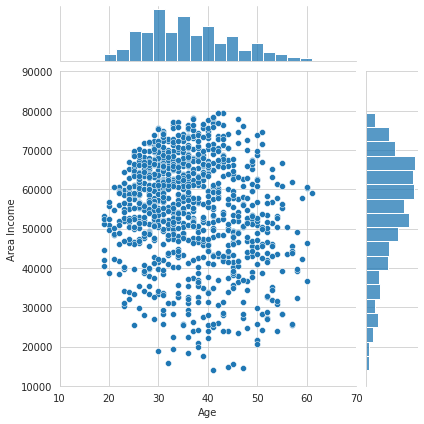

In [7]:
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data, xlim = ([10,70]), ylim = ([10000,90000]))

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

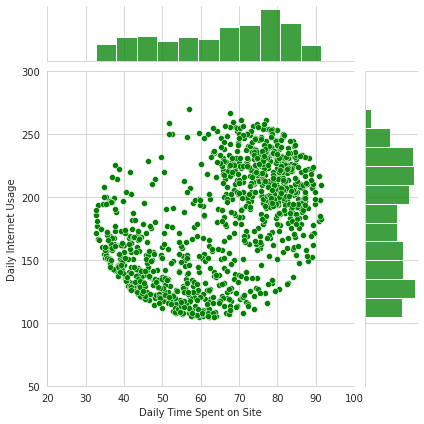

In [8]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, color = 'green', xlim = ([20,100]), ylim = ([50,300]))

# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [9]:
x = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
logmodel = LogisticRegression()

** Train and fit a logistic regression model on the training set.**

In [12]:
logmodel.fit(x_train, y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [13]:
predict = logmodel.predict(x_test)

** Create a classification report for the model.**

In [14]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.92      0.89      0.90       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [15]:
print('Confusion Matrix')
print(confusion_matrix(y_test, predict))

Confusion Matrix
[[127   9]
 [ 13 101]]
